<a href="https://colab.research.google.com/github/sinan-anu/sales-data-powerbi/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [136]:
df=pd.read_csv("/content/house_data.csv")
df.head()

,Bedrooms,SquareFootage,Location,AgeOfHouse,GarageSize,SalePrice
0,4.0,3551.0,NaN,15,3.0,298267.860126
1,5.0,855.0,Urban,50,NaN,81363.992545
2,3.0,3555.0,Urban,38,3.0,254154.007388
3,5.0,1847.0,NaN,85,1.0,123321.871315
4,NaN,3704.0,Rural,75,NaN,246704.228378


In [137]:
df.tail()

,Bedrooms,SquareFootage,Location,AgeOfHouse,GarageSize,SalePrice
995,2.0,527.0,Suburban,53,2.0,51814.524376
996,1.0,2613.0,Urban,23,3.0,230890.805680
997,1.0,3734.0,Suburban,28,0.0,188747.269803
998,4.0,1752.0,Suburban,42,3.0,188295.401291
999,3.0,760.0,Suburban,24,1.0,126508.613651


In [138]:
df.columns

Index(['Bedrooms', 'SquareFootage', 'Location', 'AgeOfHouse', 'GarageSize',
       'SalePrice'],
      dtype='object')

In [139]:
df.isna().sum()

,0
Bedrooms,50
SquareFootage,50
Location,50
AgeOfHouse,0
GarageSize,50
SalePrice,0


In [140]:
df['Bedrooms'].value_counts()

,count
Bedrooms,
1.0,202
4.0,198
5.0,195
3.0,179
2.0,176


In [141]:
df['Bedrooms'].unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

In [142]:
df['SquareFootage'].value_counts()

,count
SquareFootage,
1420.0,3
1540.0,3
3724.0,3
1894.0,3
554.0,3
...,...
3652.0,1
2250.0,1
2008.0,1


In [143]:
df['SquareFootage'].unique()

array([3551.,  855., 3555., 1847., 3704., 3435., 2363.,  626., 3677.,
       3556., 1103., 3949., 2428., 1513.,  550., 3600., 3867., 3868.,
       3326., 1930., 2292., 3361.,   nan, 3976., 3917., 2145., 2967.,
       1705., 3530., 3372., 3572., 2354., 1435., 2434., 3208., 3516.,
       1832., 3708.,  701., 2860.,  616., 1436., 1074., 2791., 1036.,
       2125., 2622.,  885., 3781.,  974.,  917., 2894., 3187., 1438.,
       1454., 1375., 1262., 1702., 1163.,  524., 2490., 1703., 1209.,
       2379., 1684., 2724.,  784.,  562., 1502., 1161., 3213., 2703.,
       1992., 3620., 1466., 1348., 1607., 3932., 1188.,  647.,  841.,
       3023., 1586., 2224., 1883., 3108.,  826., 2259., 3712., 1489.,
       2762., 2982., 1451., 1222., 3889., 2579., 3217., 2832., 3876.,
       2000.,  785., 3715., 3995., 3590., 2565., 1268., 3137., 1894.,
       3746., 3557.,  693., 3049., 1487., 1636., 2661., 2201., 1446.,
       1330., 2420., 3835., 3472.,  554., 1299., 1277., 2401., 2709.,
       3951., 2634.,

In [144]:
df['Location'].value_counts()

,count
Location,
Urban,339
Suburban,325
Rural,286


In [145]:
df['Location'].unique()

array([nan, 'Urban', 'Rural', 'Suburban'], dtype=object)

In [146]:
df['GarageSize'].value_counts()

,count
GarageSize,
0.0,245
3.0,236
1.0,235
2.0,234


In [147]:
df['GarageSize'].unique()

array([ 3., nan,  1.,  0.,  2.])

In [148]:
df.isna().sum()

,0
Bedrooms,50
SquareFootage,50
Location,50
AgeOfHouse,0
GarageSize,50
SalePrice,0


In [149]:
# Separate features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [150]:
# Define numerical and categorical features
numeric_features = ['Bedrooms', 'SquareFootage', 'AgeOfHouse', 'GarageSize']
categorical_features = ['Location']


In [151]:
# Create transformers for numeric and categorical features
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [153]:
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [164]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [154]:
#Combine into a ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [155]:
# Create full pipeline
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

In [156]:
# Train-test split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Set hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]}

In [158]:
# Perform Grid Search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Bedrooms',
                                                                          'SquareFootage',
                                                                          'AgeOfHouse',
                                                                          'GarageSize']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.05, 0.1],
                         'regressor__max_depth': [3, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [159]:
# Best model and evaluation
from sklearn.metrics import mean_squared_error, r2_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [160]:
print("Best Parameters:", grid_search.best_params_)
print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Test MSE: 906088364.93
Test R^2: 0.80


In [161]:
df.columns

Index(['Bedrooms', 'SquareFootage', 'Location', 'AgeOfHouse', 'GarageSize',
       'SalePrice'],
      dtype='object')

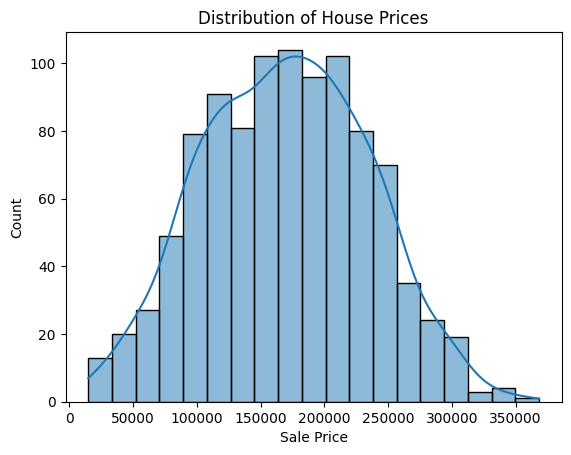

In [162]:
# some visualizations:

sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

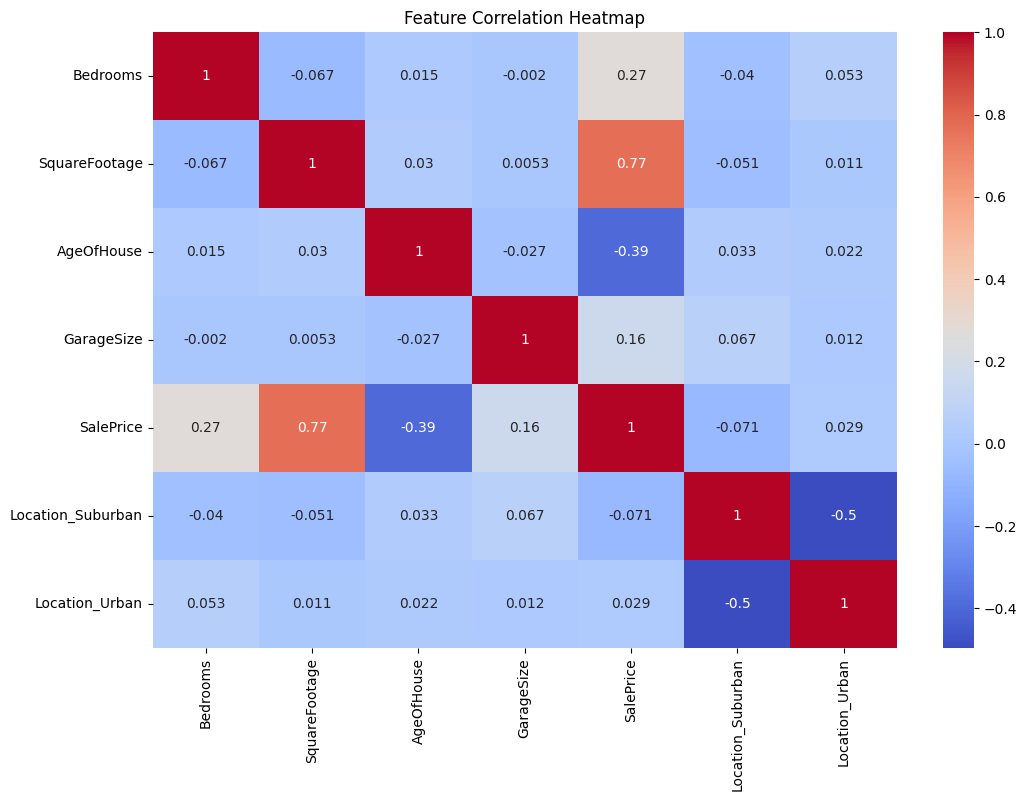

In [165]:
#Correlation Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

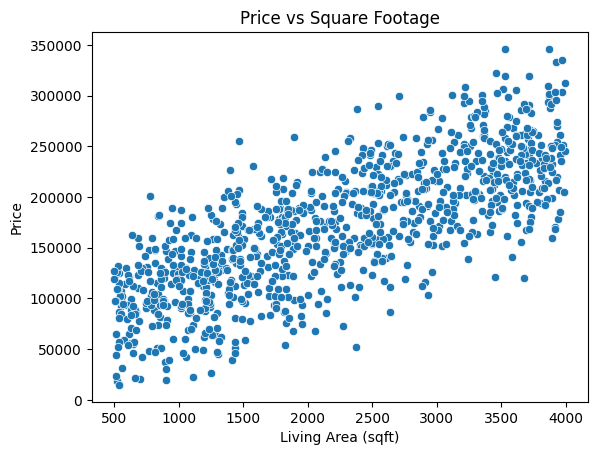

In [166]:
#scatterplot:

sns.scatterplot(x='SquareFootage', y='SalePrice', data=df)
plt.title('Price vs Square Footage')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

# Purpose
#we can see if larger homes have higher prices.